<a href="https://colab.research.google.com/github/Bruno-Guilherme/desenvolvimento-profissional/blob/main/Atividade_colaborativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Perfil do Aluno

Ao examinar os dados, observamos que a maioria dos alunos avaliados estão matriculados na modalidade EAD, são do sexo masculino e frequentam o turno vespertino. Não há nenhum aluno matriculado no turno matutino.

##Distribuição por Categoria Administrativa
Analisando a tabela de contingência entre sexo e categoria administrativa dos alunos, observamos uma predominância das Instituições de Ensino Superior (IES) privadas em relação às públicas.

##Exploração das Notas
Ao analisar as notas dos alunos, observamos que a média geral foi de 38.9 pontos. Considerando o desvio padrão de 13, podemos inferir que 75% dos alunos obtiveram uma pontuação acima da média, com uma pontuação de 46.7 pontos.

No ensino presencial, a média das notas foi de 41.87, superando ligeiramente a média geral. Entretanto, notamos que a pontuação do 75º percentil, de 45.5 pontos, foi menor do que a do geral, com um desvio padrão de 8.

Já na modalidade EAD, a média das notas foi de 38.3, aproximando-se da média geral. No entanto, observamos que 75% dos alunos também obtiveram uma pontuação de 46.7, o que é consistente com a visão geral. O desvio padrão de 13 também é semelhante ao encontrado na análise geral.

##Comparação entre Modalidades
É interessante notar que as notas no ensino presencial tendem a seguir um padrão não muito discrepante em relação ao EAD. Esta observação sugere que, apesar das diferenças nas modalidades de ensino, o desempenho dos alunos pode ser comparável.

##Box Plot
O box plot fornece um resumo visual das distribuições das notas por modalidade de ensino. Ele destaca possíveis diferenças nas tendências e variabilidade das notas entre as modalidades presencial e EAD.

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

entrada = '/content/drive/MyDrive/Estudos/SIn - 2023.2   2025.2/Segundo Período/Probabilidade e Estatística/atividade01/baseEnade17_Sistemas.xlsx'

df_enade = pd.read_excel(entrada)


Parte 1 - Traçar um perfil desses alunos, descrevendo as suas principais características, com base em tabelas de frequência e gráficos para um conjunto de variáveis categóricas. No perfil do aluno, sugerimos utilizar as seguintes variáveis categóricas: sexo, turno, modalidade do curso e categoria acadêmica.

In [ ]:
tb_freq = {}
for coluna in df_enade.columns:
  if coluna.lower() != 'id':
    serie = df_enade[coluna].value_counts()
    tb_freq[coluna] = pd.DataFrame({
        coluna: serie.index,
        'Freq': serie.to_numpy(),
        '%': (serie / serie.sum()) * 100,
        '%Acum': serie.cumsum() / serie.sum() * 100
    })
    #tb_freq[coluna].reset_index(drop=True, inplace=True)

# Adição de dados faltantes da tabela.
nova_linha = pd.DataFrame({
    'TURNO': [2],
    'Freq': [0],
    '%': [0],
    '%Acum': [0]
})
tb_freq['TURNO'] = pd.concat([nova_linha, tb_freq['TURNO']], ignore_index=True)

In [ ]:
mylabels = {'MODALIDADE': ['EAD', 'PRESENCIAL'],
          'SEXO': ['Masculino', 'Feminino'],
          'TURNO': ['Matutino', 'Vespertino', 'Integral', 'Noturno']}

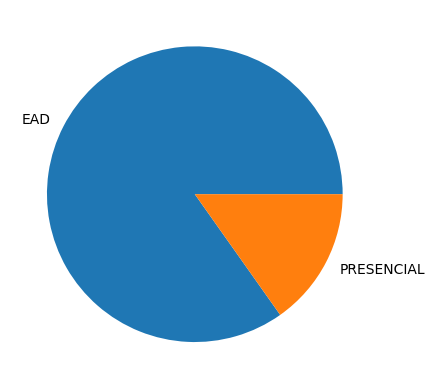

In [ ]:
plt.pie(tb_freq['MODALIDADE']['Freq'], labels = mylabels['MODALIDADE'])
plt.show()

<BarContainer object of 2 artists>

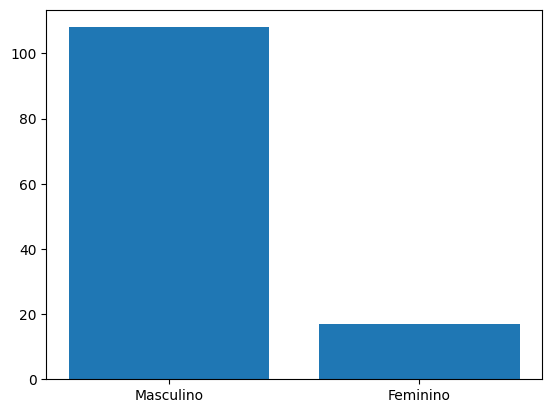

In [ ]:
plt.bar(mylabels['SEXO'], tb_freq['SEXO']['Freq'])

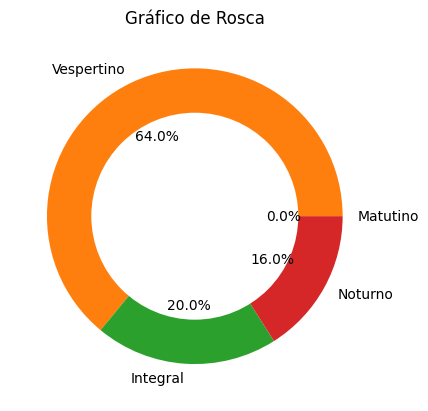

In [ ]:
plt.pie(tb_freq['TURNO']['Freq'], labels=mylabels['TURNO'], autopct='%1.1f%%')
plt.title('Gráfico de Rosca')
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.show()

Parte 2 - Escolha duas das variáveis categóricas e fará uma tabela de contingência (cruzamento), representação gráfica e análise dos dados obtidos nessa tabela.

In [19]:
# Separação das variáveis

qualitativa = [
    'MODALIDADE', 'SEXO', 'TURNO', 'CategoriaAdm'
    ]
quantitativa = [
    'IDADE', 'NOTA_GERAL', 'NOTA-FORM_GER', 'NOTA_COMPESPE', 'HorasEst'
    ]

In [ ]:
# Análise dos dados

df_enade.head() # Overview

# df_enade.info(0) # Informações gerais

In [17]:
# Limpeza dos dados
df_enade.dropna(inplace = True)

In [79]:
# Tabela de Contigência
tb_contigencia = pd.crosstab(df_enade['CategoriaAdm'], df_enade['SEXO'])
tb_contigencia.head()

SEXO,F,M
CategoriaAdm,,
Privada,10,81
Publica,7,27


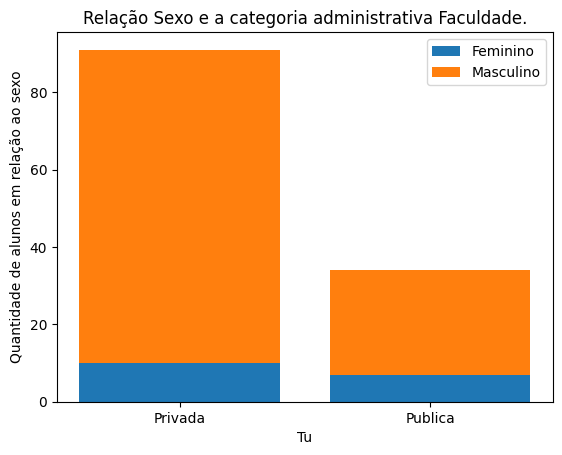

In [80]:
# Gráfico dos dados analisados
linhas = tb_contigencia.index
valoresF = tb_contigencia.iloc[:, 0]
valoresM = tb_contigencia.iloc[:, 1]

plt.bar(linhas, valoresF, label="Feminino")
plt.bar(linhas, valoresM, label='Masculino', bottom=valoresF)

plt.title('Relação Sexo e a categoria administrativa Faculdade.')
plt.xlabel('Tu')
plt.ylabel('Quantidade de alunos em relação ao sexo')

plt.legend()


plt.show()

Parte 3 - Fazer um estudo descritivo/exploratório das notas obtidas pelos alunos, considerando as notas como um todo e segmentadas por modalidade do curso, fazendo uma análise de possíveis diferenciais das notas entre cursos EAD versus cursos presenciais.



Na análise descritiva das notas, sugerimos utilizar: média, mediana, desvio padrão, coeficiente de variação e gráfico BoxPlot ou Histograma.

In [105]:
# Análise descritiva das notas gerais:

print(df_enade['NOTA_GERAL'].describe())
print()
# Seleciona as linhas com os valores iguais a 0 na coluna Modalidade
# Seleciona os valores na coluna NOTA_GERAL que estejam nas linhas selecionadas;
print(df_enade[df_enade['MODALIDADE'] == 0]['NOTA_GERAL'].describe())
print()
print(df_enade[df_enade['MODALIDADE'] == 1]['NOTA_GERAL'].describe())

count    125.000000
mean      38.880800
std       13.190519
min       12.800000
25%       30.100000
50%       39.600000
75%       46.700000
max       83.800000
Name: NOTA_GERAL, dtype: float64

count    19.000000
mean     41.873684
std       8.220695
min      21.100000
25%      37.700000
50%      43.000000
75%      45.500000
max      61.800000
Name: NOTA_GERAL, dtype: float64

count    106.000000
mean      38.344340
std       13.855582
min       12.800000
25%       28.225000
50%       37.450000
75%       46.775000
max       83.800000
Name: NOTA_GERAL, dtype: float64


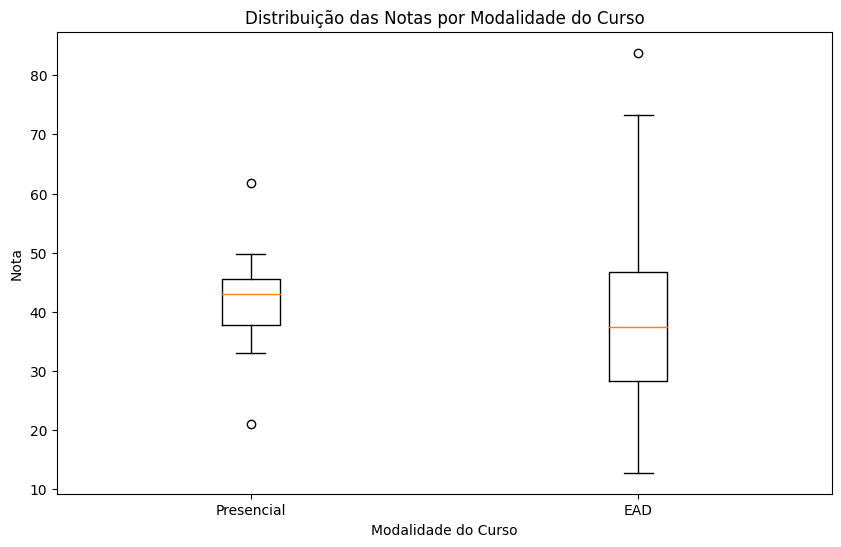

In [106]:
plt.figure(figsize=(10, 6))
plt.boxplot([df_enade[df_enade['MODALIDADE'] == 0]['NOTA_GERAL'],
             df_enade[df_enade['MODALIDADE'] == 1]['NOTA_GERAL']],
            labels=['Presencial', 'EAD'])
plt.title('Distribuição das Notas por Modalidade do Curso')
plt.xlabel('Modalidade do Curso')
plt.ylabel('Nota')
plt.show()